<a href="https://colab.research.google.com/github/ShabnaIlmi/iris-project/blob/main/Iris_Flower_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing Necessary Libraries**

In [1]:
# Installing necessary libraries
!pip install shap
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=97714697f99782cb5b076c10107dbda64480a85e349e1d4df6d94f9483bd9673
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


# **Importing the Relevant Libraries**

In [60]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import lime.lime_tabular
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.datasets import load_iris, load_svmlight_file
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# **Loading the Dataset**

In [3]:
# Loading the dataset using Scikit-learn
iris = load_iris()

### **Displaying the first few rows of the Iris Dataset**

In [4]:
# Displaying the first few rows of the iris dataset
iris_data = sns.load_dataset("iris")
iris_data.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

# **Exploratory Data Analysis**

In [5]:
# Displaying dataset information
print("Displaying iris data information")
iris_data.info()

Displaying iris data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Checking the basic statistic of the dataset (mean, min, max, etc,....)**

In [6]:
# Checking the basic statistic of the dataset
iris_data.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

**Identifying categorical and numerical columns**

In [7]:
# Identifying categorical and numerical columns
categorical_cols = iris_data.select_dtypes(include=['object']).columns
numerical_cols = iris_data.select_dtypes(include=['int64', 'float64']).columns

## **Categorical Features**

In [8]:
# List of categorical features
categorical_features = iris_data.select_dtypes(include=['object']).columns

# Displaying the categorical features
print("Categorical Features:")
for feature in categorical_features:
    print(f"- {feature}")

# Display data type of the columns
print("\nData Type of Categorical Features:")
print(iris_data[categorical_features].dtypes)

Categorical Features:
- species

Data Type of Categorical Features:
species    object
dtype: object


**Unique values and their counts relevant to each categorical column**

In [9]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = iris_data[col].unique()
    value_counts = iris_data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
 


In [10]:
# Displaying the categorical columns which contain null values and their counts
found_nulls = False
for col in categorical_features:
    null_count = iris_data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")
        found_nulls = True

if not found_nulls:
    print("There are no null values in the categorical columns")

There are no null values in the categorical columns


In [11]:
# Displaying the categorical columns which contain 'Unknown' or 'N/A' values and their relevant counts
found_unknown_na = False

for col in categorical_features:
    unknown_count = (iris_data[col] == 'Unknown').sum()
    na_count = (iris_data[col] == 'N/A').sum()

    if unknown_count > 0 or na_count > 0:
        found_unknown_na = True
        if unknown_count > 0:
            print(f"{col} - 'Unknown': {unknown_count}")
        if na_count > 0:
            print(f"{col} - 'N/A': {na_count}")

if not found_unknown_na:
    print("There are no values with 'Unknown' or 'N/A' in the catgorical columns")

There are no values with 'Unknown' or 'N/A' in the catgorical columns


**Observation -: There are no visible null values contained in the categorical column (target variable) of the dataset.**

## **Numerical Features**

In [12]:
# Numerical Features
numerical_features = iris_data.select_dtypes(include=['int64', 'float64']).columns

# Displaying the Numerical Columns
print("Numerical Features:")
print(numerical_features)

Numerical Features:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


**Unique values and their count relevant to each numerical column**

In [13]:
# Displaying the unique values and their count in the numerical columns
print("Unique values and their count in the numerical columns:\n")
for col in numerical_features:
    unique_values = iris_data[col].unique()
    value_counts = iris_data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count in the numerical columns:

sepal_length
5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
6.4     7
5.5     7
5.8     7
4.9     6
6.0     6
5.4     6
5.6     6
6.1     6
6.5     5
4.8     5
7.7     4
6.9     4
4.6     4
5.2     4
6.2     4
4.4     3
7.2     3
5.9     3
6.8     3
4.7     2
6.6     2
4.3     1
7.0     1
5.3     1
4.5     1
7.1     1
7.3     1
7.6     1
7.4     1
7.9     1
Name: count, dtype: int64
 
sepal_width
3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
2.9    10
2.7     9
2.5     8
3.3     6
3.5     6
3.8     6
2.6     5
3.6     4
2.3     4
3.7     3
2.2     3
2.4     3
3.9     2
4.4     1
4.2     1
4.1     1
4.0     1
2.0     1
Name: count, dtype: int64
 
petal_length
1.4    13
1.5    13
4.5     8
5.1     8
1.3     7
1.6     7
5.6     6
4.9     5
4.0     5
4.7     5
1.7     4
4.8     4
5.0     4
4.4     4
4.2     4
4.1     3
3.9     3
5.8     3
5.7     3
5.5     3
6.1     3
4.6     3
1.9     2
5.2     2
5.4     2
1.2     2
3.3     2

**Numerical columns with null values and
their relevant counts**

In [14]:
# Displaying the numerical columns with null values and their relevant counts
found_nulls = False

for col in numerical_cols:
    null_count = iris_data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")
        found_nulls = True

if not found_nulls:
    print("There are no null values in the Numerical Columns.")

There are no null values in the Numerical Columns.


**Observation -: There are no visible null values contained within the numerical columns of the dataset**

## **Visualizing the Distribution of the Numerical Columns**

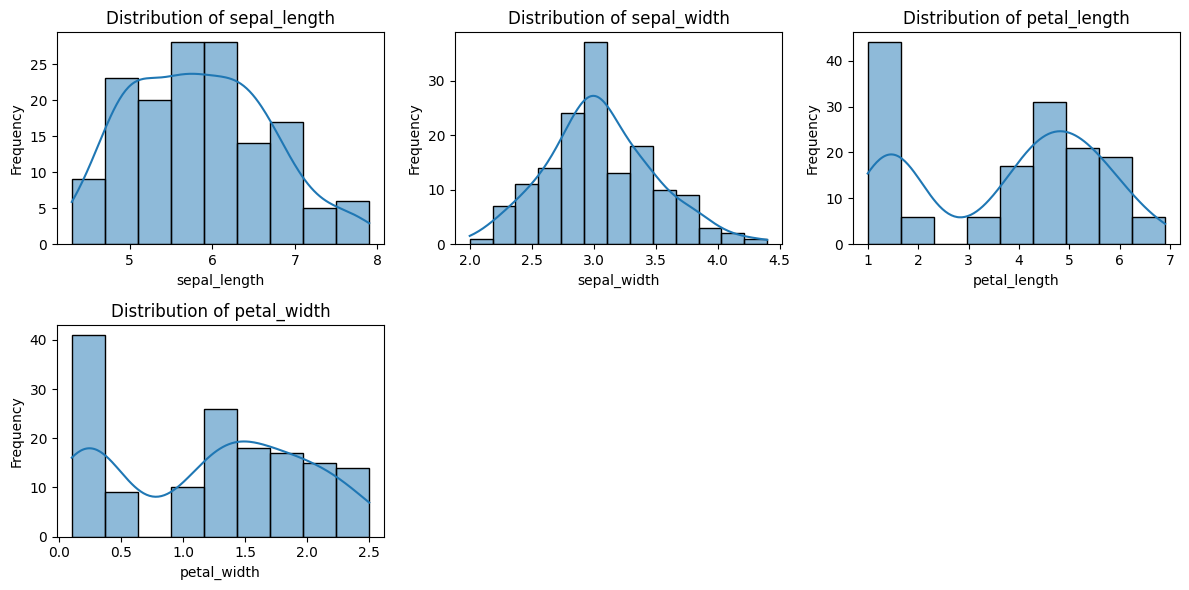

In [15]:
# Visualizing the distribution of the Numerical Columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(iris_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Observation -:**

**1. Sepal Length Distribution - Normally distributed.**

**2. Sepal Width Distribution - Close to normal but slightly left-skewed.**

**3. Petal Length Distribution - Shows a binomial distribution.**

**4. Petal Width - Shows a bimodal distribution.**


## **Visualizing the Correlation Heatmap**

In [16]:
# Visualizing the Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(iris_data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Observation -:**

**1. *petal_length* and *petal_width* have a very high correlation of ~0.96.**

**2. *sepal_length* has a higher correlation of ~0.87 with both the *petal_length* and the *petal_width* columns.**

**3. *sepal_width* has a negative correlation with the *sepal_length* (-0.12), *petal_length* (-0.43), and *petal_width* (-0.37)**.

In [17]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical columns
X = iris_data.select_dtypes(include=['number'])

# Compute VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

        Feature         VIF
0  sepal_length  262.969348
1   sepal_width   96.353292
2  petal_length  172.960962
3   petal_width   55.502060


**Variance Inflation Factor is used in order to verify the existence of the multicollinearity in the dataset.**

## **Visualizing the Outliers**

In [18]:
# Visualizing the Outliers in numerical values

# Selecting only numerical columns
numerical_features = iris_data.select_dtypes(include=['number']).columns

# Creating a DataFrame to store the results
outlier_bounds = []

for col in numerical_features:
    Q1 = iris_data[col].quantile(0.25)
    Q3 = iris_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_bounds.append([col, Q1, Q3, IQR, lower_bound, upper_bound])

# Convert to DataFrame for better readability
outlier_data = pd.DataFrame(outlier_bounds,
                          columns=['Feature', 'Q1', 'Q3', 'IQR', 'Lower Bound', 'Upper Bound'])

# Display the DataFrame
print(outlier_data)

        Feature   Q1   Q3  IQR  Lower Bound  Upper Bound
0  sepal_length  5.1  6.4  1.3         3.15         8.35
1   sepal_width  2.8  3.3  0.5         2.05         4.05
2  petal_length  1.6  5.1  3.5        -3.65        10.35
3   petal_width  0.3  1.8  1.5        -1.95         4.05


**Observation -: All the four numerical columns contains one outlier each.**

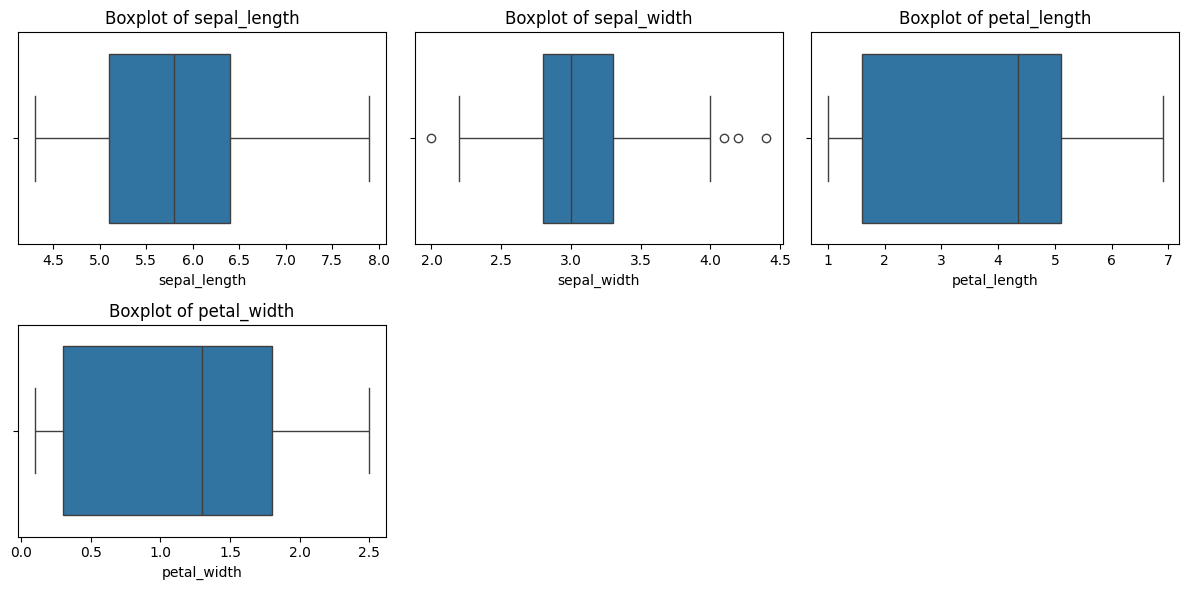

In [19]:
# Visualizing the Outliers - Box Plot
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=iris_data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

## **Visualizing the Distribution of the Target Variable**

In [20]:
# Visualizing the Distribution of the Target Variable
plt.figure(figsize=(8, 6))
sns.histplot(iris_data['species'], kde=True)
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.show()

**Observation -: A balanced distribution among the three categories (setosa, versicolor, virginica) in the Target Variable.**

# **Data Preprocessing**

## **Data Cleaning**

In [21]:
# # Step 1: Removing whitespaces from the object type columns
object_columns = iris_data.select_dtypes(include=['object']).columns
iris_data[object_columns] = iris_data[object_columns].apply(lambda x: x.str.strip())

In [22]:
# Step 2: Dropping duplicate values
iris_data.drop_duplicates(inplace=True)
iris_data.reset_index(drop=True, inplace=True)

In [23]:
# Display dataset information
print("\nDataset information after removing duplicates:")
iris_data.info()


Dataset information after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# **Categorical Columns**

## **Data Encoding**

In [24]:
# Step 3: Encoding the Categorical Columns using the label encoder
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])

# Saving the encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

## **Numerical Columns**

In [25]:
# Step 4: Handling the outliers in the numerical columns

# Removing outliers from numerical features
filtered_data = iris_data.copy()

for col in numerical_features:
    Q1 = iris_data[col].quantile(0.25)
    Q3 = iris_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keeping only values within the bounds
    filtered_data = filtered_data[(filtered_data[col] >= lower_bound) & (filtered_data[col] <= upper_bound)]

print(f"Original data shape: {iris_data.shape}")
print(f"Filtered data shape: {filtered_data.shape}")

Original data shape: (149, 5)
Filtered data shape: (145, 5)


**Observation -: The numerical columns which contained outliers are dropped in order to main the consistency in the dataset.**

In [26]:
# Step 5: Features (X) and Target (y)
X = filtered_data.drop(['species'], axis=1)
y = filtered_data['species']

In [27]:
# Step 6: Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Step 7: Handling the collinearity in the dataset

# Apply Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)

# Get the coefficients
coefficients = ridge.coef_

# Display the coefficients
coef_data = pd.DataFrame(coefficients, index=X.columns, columns=['Coefficient'])
print(coef_data)

              Coefficient
sepal_length    -0.067010
sepal_width     -0.029130
petal_length     0.367028
petal_width      0.466717


**Observation -: Ridge Regression has been used to eliminate the multicollinearity in the dataset. This successfully handles the multicollinearity in the dataset when comparing with the other methods.**

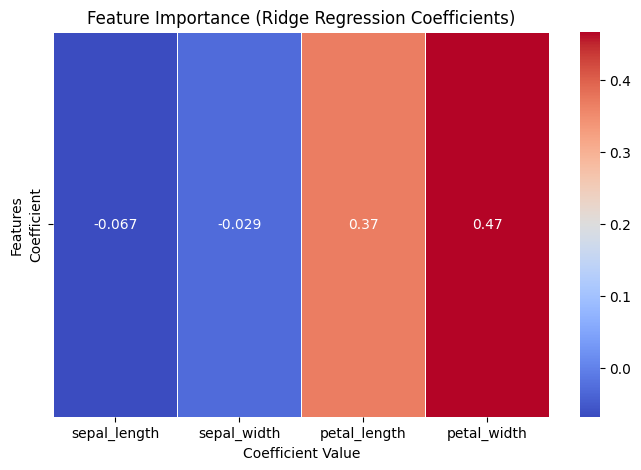

In [64]:
# Visualizing the Heatmap after the handling of the multicollinearity
plt.figure(figsize=(8, 5))
sns.heatmap(coef_data.T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Importance (Ridge Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

In [29]:
# Step 8: Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Building the Machine Learning Model**

## **Selection of the Model**

### **Model based on Random Forest**

In [30]:
# Defining the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [31]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [32]:
# Setting up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [33]:
# Fitting GridSearchCV to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [34]:
# Displaying the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [35]:
# Getting the best model from the grid search
best_rf = grid_search.best_estimator_

In [36]:
# Predicting on the test set
y_pred = best_rf.predict(X_test)

## **Evaluating the Model Performance**

In [37]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9310344827586207
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        29
   macro avg       0.95      0.93      0.93        29
weighted avg       0.94      0.93      0.93        29



## **Visualizing the Results**

In [38]:
# Plotting the Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']),
            annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()

## **Saving the Model for Future Use**

In [39]:
# Saving the model and the scaler for future use
joblib.dump(best_rf, 'iris_rf_model.pkl')
joblib.dump(scaler, 'rf_scaler.pkl')

['rf_scaler.pkl']

# **Explainable AI - XAI**

## **LIME Explainer**

In [40]:
# Creating a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_scaled,
    feature_names=X.columns,
    class_names=['Target'],
    mode='regression'
)

# Selecting a random instance
instance_index = 10
instance = X_scaled[instance_index, :].reshape(1, -1)

# Explaining the prediction for this instance
explanation = explainer.explain_instance(instance[0], ridge.predict, num_features=5)

# Displaying the explanation
explanation.show_in_notebook()

**Observation -:**

**1. Prediction Range - Between -0.35 (min) to 2.41 (max).**

**2. Positive and Negative Class Representation - Orange (Positive) and Blue (Negative).**

**3. Petal Width and the Petal Length negatively impact the prediction. (Brings the prediction down).**

**4. Sepal Length positively impact the prediction (Brings the prediction up).**

In [41]:
# Creating a SHAP explainer for Ridge Regression
explainer = shap.Explainer(ridge, X_scaled)

# Selecting an instance (using NumPy indexing)
instance_index = 10
instance = X_scaled[instance_index, :].reshape(1, -1)

# Getting SHAP values for this instance
shap_values = explainer(instance)

# Plotting SHAP values for this specific instance
shap.initjs()
shap.force_plot(shap_values.base_values[0], shap_values.values[0], instance)

**1. The prediction was reduced significantly due to the negative contributions of Feature 3 and Feature 2.**

**2. The model initially had a higher base value, but these features lowered the prediction to -0.10.**

# **Prediction**

In [42]:
# Loading the saved model and encoder
model = joblib.load('iris_rf_model.pkl')
encoder = joblib.load('label_encoder.pkl')

In [43]:
# Getting the prediction

# Getting user inputs
def get_user_input():
    sepal_length = float(input("Enter sepal length: "))
    sepal_width = float(input("Enter sepal width: "))
    petal_length = float(input("Enter petal length: "))
    petal_width = float(input("Enter petal width: "))

    # Returning as a numpy array
    return np.array([sepal_length, sepal_width, petal_length, petal_width]).reshape(1, -1)

# Preprocessing the user input
def preprocess_input(user_input):
    # Scaling the input using the same scaler that was used during training
    scaler = joblib.load('rf_scaler.pkl')
    user_input_scaled = scaler.transform(user_input)

    return user_input_scaled

# Getting the user input
user_input = get_user_input()

# Preprocessing the input
user_input_scaled = preprocess_input(user_input)

# Making prediction using the trained model
prediction = model.predict(user_input_scaled)

# Decoding the prediction
predicted_class = encoder.inverse_transform(prediction)

# Displaying the result
print(f"\nPredicted class: {predicted_class[0]}")

Enter sepal length: 5.1
Enter sepal width: 3.5
Enter petal length: 1.4
Enter petal width: 0.2

Predicted class: setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### **Model based on SVM (Support Vector Machines)**

In [44]:
# SVM Model with Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 5]
}

In [45]:
# Instantiating the SVM model
svm_model = SVC()

In [46]:
# Applying GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [47]:
# Best parameters from GridSearchCV
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

Best Parameters from GridSearchCV: {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}


In [48]:
# Getting the best model
best_svm_model = grid_search.best_estimator_

In [49]:
# Evaluating the best model on the test set
y_pred = best_svm_model.predict(X_test)

In [50]:
# Cross-validation score (to evaluate model performance more robustly)
cv_scores = cross_val_score(best_svm_model, X_train, y_train, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Average Cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [1.         1.         1.         0.95652174 0.91304348]
Average Cross-validation score: 0.9739130434782608


## **Evaluating the Model Performance**

In [51]:
# Print the classification report with the model accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9655172413793104

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.97        29
weighted avg       0.97      0.97      0.97        29



In [52]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [54]:
# Save the best model and scaler for later use
joblib.dump(best_svm_model, 'best_svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## **Visualizing the Results**

In [55]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for SVM Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Saving the Model for Future Use**

## **Explainable AI - XAI**

## **LIME Explainer**

In [56]:
# Creating a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=X.columns,
    class_names=['Target'],
    mode='regression'
)

# Selecting a random instance
instance_index = 10
instance = X_train[instance_index, :].reshape(1, -1)

# Explaining the prediction for this instance
explanation = explainer.explain_instance(instance[0], ridge.predict, num_features=5)

# Displaying the explanation
explanation.show_in_notebook()

**Observation -:**

**1. Prediction Range - Between -0.37 (min) to 2.48 (max).**

**2. Positive and Negative Class Representation - Orange (Positive) and Blue (Negative).**

**3. Petal Width, Petal Length and Sepal Width positively impact the prediction. (Brings the prediction up).**

**4. Sepal Length nrgatively impact the prediction (Brings the prediction down).**


## **SHAP Explainer**

In [57]:
# Creating a SHAP explainer for Ridge Regression
explainer = shap.Explainer(ridge, X_train)

# Selecting an instance (using NumPy indexing)
instance_index = 10
instance = X_train[instance_index, :].reshape(1, -1)

# Getting SHAP values for this instance
shap_values = explainer(instance)

# Plotting SHAP values for this specific instance
shap.initjs()
shap.force_plot(shap_values.base_values[0], shap_values.values[0], instance)

**Observation -: The model's prediction was pushed up by Features 2 and 3 while Feature 0 attempted to decrease it but had a lesser impact.**

# **Prediction**

In [58]:
# Loading the saved model and encoder
svm_model = joblib.load('best_svm_model.pkl')
encoder = joblib.load('label_encoder.pkl')

In [63]:
# Getting the prediction

# Getting user inputs
def get_user_input():
    sepal_length = float(input("Enter sepal length: "))
    sepal_width = float(input("Enter sepal width: "))
    petal_length = float(input("Enter petal length: "))
    petal_width = float(input("Enter petal width: "))

    # Returning as a numpy array
    return np.array([sepal_length, sepal_width, petal_length, petal_width]).reshape(1, -1)

# Preprocessing the user input
def preprocess_input(user_input):
    # Scaling the input using the same scaler that was used during training
    scaler = joblib.load('scaler.pkl')
    user_input_scaled = scaler.transform(user_input)

    return user_input_scaled

# Getting the user input
user_input = get_user_input()

# Preprocessing the input
user_input_scaled = preprocess_input(user_input)

# Making prediction using the trained model
prediction = svm_model.predict(user_input_scaled)

# Decoding the prediction
predicted_class = encoder.inverse_transform(prediction)

# Displaying the result
print(f"\nPredicted class: {predicted_class[0]}")

Enter sepal length: 6.3
Enter sepal width: 3.3
Enter petal length: 6
Enter petal width: 2.5

Predicted class: virginica


**When comparing the models based on Random Forest and the SVM (Support Vector Machines) both have higher accuarcy yet the SVM model performs a bit more afficiently and it is visible with the evaluation methodologies like the classification report, accuracy score, confusion matrix and the Exaplaiable AI (XAI) methodologies like the LIME and SHAP. So SVM (Support Vector Machine) model is used in this context.**